<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Andrés Duarte Robles | Andrés Green Garciarce.

**Fecha:** 31 de octubre del 2020.

**Expediente** : 718957 | 713504 
    
**Profesor:** Oscar David Jaramillo Zuluaga.

**Liga GitHub:** https://github.com/andresgreen-byte/Green_Duarte_Tareas

# Tarea 8 a) Clase 16

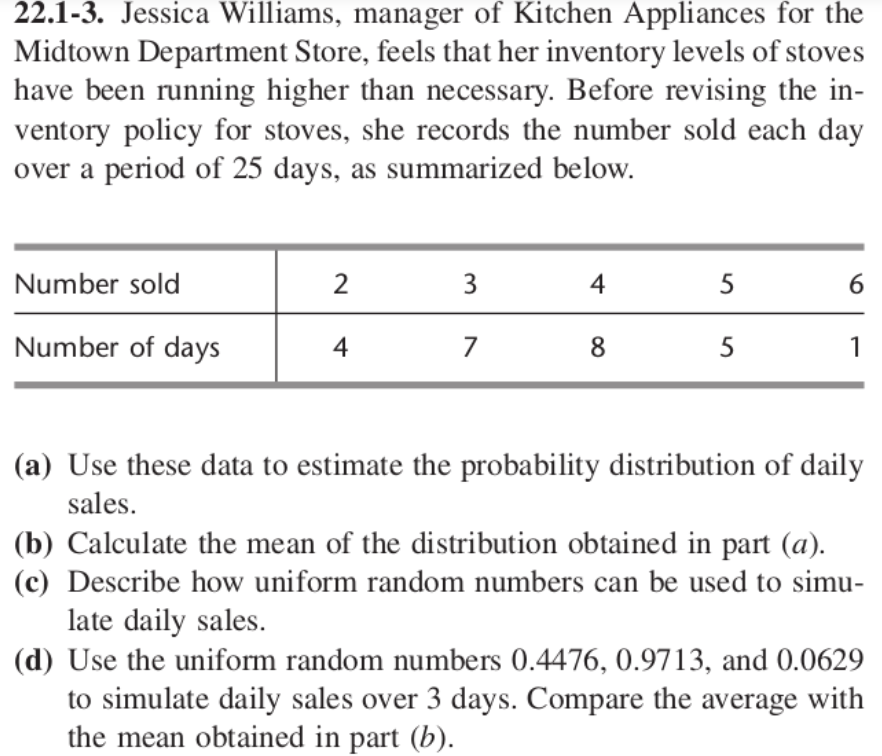
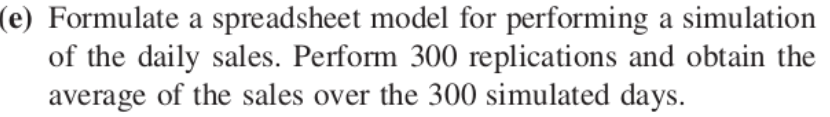

In [108]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from scipy import optimize

In [109]:
# Función de aceptación y rechazo usando una constante para t(x)
def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'
):
    X = np.zeros(N)
    i=0
    while i<N:
        R2=np.random.uniform(0, max_f)
        R1=np.random.uniform(Dom_f[0], Dom_f[1])
        if R2<=f(R1):
            X[i]=R1
            i+=1

    return X

In [110]:
# Función que grafica subplots para cada señal de distribución Erlang
def histograma_vs_densidad(signal:'variable con muestras aleatorias de la distribución generada',
                           f:'función de distribución de probablidad f(x) de la variable aleatoria'):

    plt.figure(figsize=(8,3))
    count, x, _ = plt.hist(signal,100,density=True)
    y = f(x)
    plt.plot(x, y, linewidth=2,color='k')
    plt.ylabel('Probabilidad')
    plt.xlabel('Muestras')
#     plt.legend()
    plt.show()

In [111]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(len(U)))))
    return v

In [112]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,density = True,bins = len(set(distribucion))-1) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()

# Transformada inversa

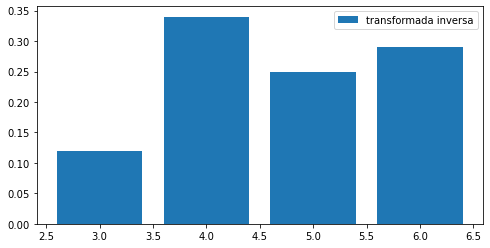

In [113]:
np.random.seed(55)
N = 100

u =np.random.rand(N)
mi = Gen_distr_discreta(u,p_acumulada)+2

plot_histogram_discrete(mi, "transformada inversa")

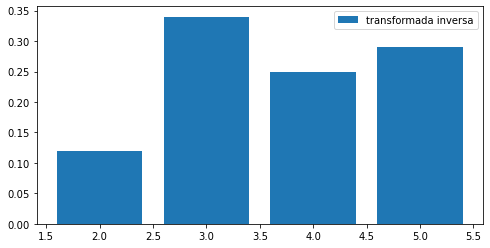

In [114]:
np.random.seed(55)
N = 100

u =np.random.rand(N)
mi = Gen_distr_discreta(u,p_acumulada)+1

plot_histogram_discrete(mi, "transformada inversa")

## Estimar media

In [115]:
# Calcular la media teórica según la ecuación anterior
media= [num_vent[i]*probabilidad[i] for i in range(len(num_dias))]
np.sum(media)

3.6800000000000006

 # a) Montecarlo

In [116]:
# Estudiante 1
# Usar montecarlo crudo para estimar la media
n = 100000 # Cantidad de simulaciones

u = np.random.rand(n)

f_u = Gen_distr_discreta(u,p_acumulada)+2

media_montecarlo = np.array(f_u)
np.mean(media_montecarlo)

3.67716

In [117]:
#Estudainte 2
N = 100000
u1 = np.random.rand(N)
f_u1 = Gen_distr_discreta(u1,p_acumulada)+2
media_montecarlo = np.array(f_u1)
np.mean(media_montecarlo)

3.67758

# b) Muestreo estratificado

- 30% de las muestras entre 0 y 0.2
- 40% de las muestras entre 0.2 y 0.8
- 30% de las muestras entre 0.8 y 1

In [118]:
#Estudiante 1


n1 = N*0.3; n2 = N*0.4; n3 = N*0.3
suma = n1+n2+n3
r1 = np.random.uniform(0, 0.2, int(n1))
r2 = np.random.uniform(0.2, 0.8, int(n2))
r3 = np.random.uniform(0.8, 1, int(n3))
r = [r1, r2, r3]

w1 = n1/suma/0.2
w2 = n2/suma/0.6
w3 = n3/suma/0.2
w = [w1, w2, w3]

f_u1 = lambda u: (Gen_distr_discreta(u,p_acumulada)+2)

mu = list(map(lambda x:(f_u1(x)), r))


Est = list(map(lambda x, wi: x/wi, mu, w))



Estratificada = np.concatenate(Est)

med = np.mean(Estratificada)

print(med) 

3.682913333333333


In [119]:
#Estudiante 2

n1 = N*0.3; n2 = N*0.4; n3 = N*0.3
suma = n1+n2+n3
r1 = np.random.uniform(0, 0.2, int(n1))
r2 = np.random.uniform(0.2, 0.8, int(n2))
r3 = np.random.uniform(0.8, 1, int(n3))
r = [r1, r2, r3]

#Encontrar ponderación 
w1 = n1/suma/0.2
w2 = n2/suma/0.6
w3 = n3/suma/0.2
w = [w1, w2, w3]

f_u1 = lambda u: (Gen_distr_discreta(u,p_acumulada)+2)

muestras2 = list(map(lambda x:(f_u1(x)), r))

#Cada xi y dividirlo por wi
Estratif1 = list(map(lambda x, wi: x/wi, muestras2, w))

#Sacar la media, pero para esto
Estratif = np.concatenate(Estratif1)
med = np.mean(Estratif)
print(med) 

3.6823249999999996


# c) Estratificado 2
Escribir una función en donde le ingreses el número de estratos y esta te retorne un conjunto de variables aleatorias donde todos los estratos se encuentran igualmente espaciadas

In [120]:
#Estudiante 1
def estra_igualmente_espaciado(B):
    """
    Escribir la función acá y debidamente comentarla
    """
    U2= np.random.rand(B)
    i= np.arange(0,B)
    estratos= (U2+i)/B
    return estratos

In [121]:
#Estudiante 1
f_u2= lambda U: Gen_distr_discreta(U, df["p_acumulada"])+2
U= estra_igualmente_espaciado(N)
m3= f_u2(U)

print('Estratificado 2 =',np.mean(m3))


Estratificado 2 = 3.68


In [122]:
#Estudiante 2
def estra_igualmente_espaciado(B):
    """
    Escribir la función acá y debidamente comentarla
    """
    U2= np.random.rand(B)
    i= np.arange(0,B)
    estratos= (U2+i)/B
    return estratos

In [123]:
#Estudiante 2
f_u2= lambda U: Gen_distr_discreta(U, df["p_acumulada"])+2
U= estra_igualmente_espaciado(N)
m3= f_u2(U)

print('Estratificado 2 =',np.mean(m3))

Estratificado 2 = 3.68


# Ejercicio 2
Distribución geométrica (Método de aceptación y rechazo distribuciones discretas)
$$ f(x) = p(1-p)^{x-1}, \quad x\in 1,2,3,4,5,\cdots$$

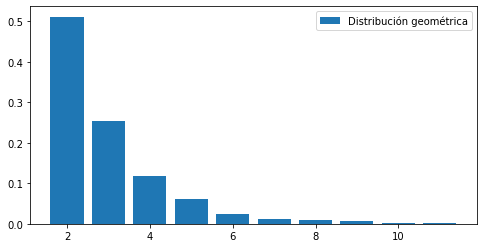

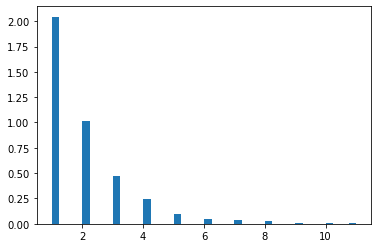

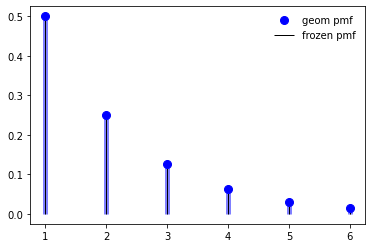

In [124]:
#Solución Estudiante 1

def acep_rechazo_simplificada(
    n:'Cantidad de variables a generar',
    domf:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'):
    x = np.zeros(n)
    i=0
    while i<n:
        R2=np.random.uniform(0,max_f)
        R1=np.random.randint(domf[0], domf[1])
        if R2<= f(R1):
            x[i]=R1
            i+=1
    return x

distr_a_r=acep_rechazo_simplificada(10**3, (1,18), f_x, max_f)

plot_histogram_discrete(distr_a_r, "Distribución geométrica")


#aceptación y recahzo
plt.hist(distr_a_r, bins=40, density=True, label="Método de aceptación y rechazo")


#scipy stats 
fig, ax = plt.subplots(1, 1)
p = 0.5
mean, var, skew, kurt = st.geom.stats(p, moments='mvsk')
x = np.arange(st.geom.ppf(0.01, p),
              st.geom.ppf(0.99, p))
ax.plot(x, st.geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, st.geom.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = st.geom(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

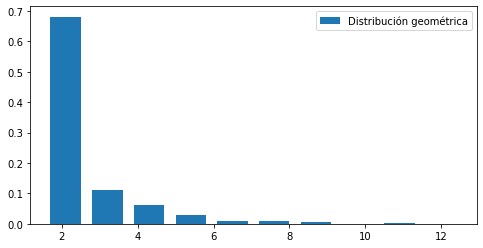

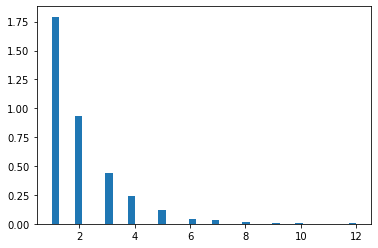

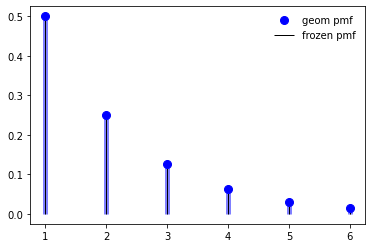

In [125]:
#Solución Estudiante 2
N = 1000
p = 0.5
f_x = lambda x: p*(1-p)**(x-1)
max_f=0.5

# Función de aceptación y rechazo usando una constante para t(x)
def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'):
    X = np.zeros(N)
    i=0
    while i<N:
        R2=np.random.uniform(0,max_f)
        R1=np.random.randint(Dom_f[0], Dom_f[1])
        if R2<= f(R1):
            X[i]=R1
            i+=1

    return X

distr_a_r=acep_rechazo_simplificada(10**3, (1,18), f_x, max_f)

plot_histogram_discrete(distr_a_r, "Distribución geométrica")


#aceptación y recahzo
plt.hist(distr_a_r, bins=40, density=True, label="Método de aceptación y rechazo")


#scipy stats 
fig, ax = plt.subplots(1, 1)
p = 0.5
mean, var, skew, kurt = st.geom.stats(p, moments='mvsk')
x = np.arange(st.geom.ppf(0.01, p),
              st.geom.ppf(0.99, p))
ax.plot(x, st.geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, st.geom.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = st.geom(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

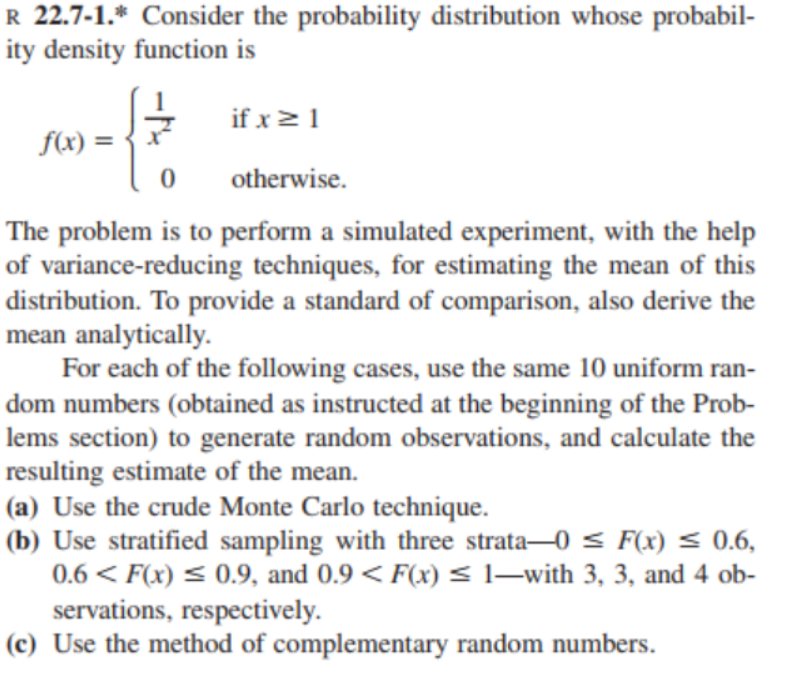

 # a) Montecarlo

In [126]:
#Green A

fx = lambda x: 1/x**2

f_inv = lambda u: 1/(1-u)

In [127]:
N=1000
u = np.random.uniform(0,0.90, N)
m1 = f_inv(u)
sol1 = m1.mean()
sol1

2.5175607041639014

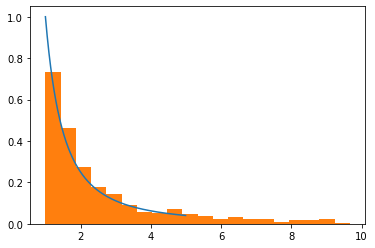

In [128]:
x = np.arange(1,5,0.01)
plt.plot(x, fx(x))
plt.hist(m1, bins=20, density=True)
plt.show()

In [129]:
#Duarte A
fx = lambda x: 1/x**2
#integral de 1 a x
#Fx = -1/x
#U = -1/x
f_inv = lambda u: 1/(1-u)

In [130]:
N=1000
u = np.random.uniform(0,0.90, N)
m1 = f_inv(u)
sol1 = m1.mean()
sol1

2.5059739437246416

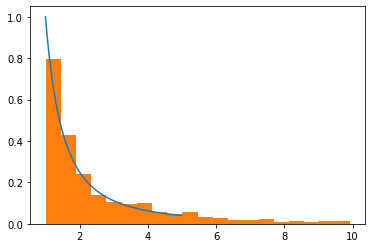

In [131]:
x = np.arange(1,5,0.01)
plt.plot(x, fx(x))
plt.hist(m1, bins=20, density=True)
plt.show()